# Non-parametric Statistics 
## Chapter 2: Kernel Density Estimation
### Bnadwidth Selection

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

from scipy import stats

In [4]:
# this code should work for anyone who cloned the project via github
# as it ensures that you have the correct project structure
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))
plots_folder = os.path.join(project_root, "plots/chap2/bandwidths")

# Please check this is correct path, hopefully it works fine
plots_folder

'/Users/wuzm/UOEY4S2/nonparam-stats-proj/plots/chap2/bandwidths'

/var/folders/72/czpkdkzd62bbvhzjzt68qnlw0000gn/T/ipykernel_60620/152412732.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(h, squared_bias, 'k--', c='red', label='Bias squared')
/var/folders/72/czpkdkzd62bbvhzjzt68qnlw0000gn/T/ipykernel_60620/152412732.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-." (-> color='k'). The keyword argument will take precedence.
  plt.plot(h, variance, 'k-.', c='blue', label='Variance')


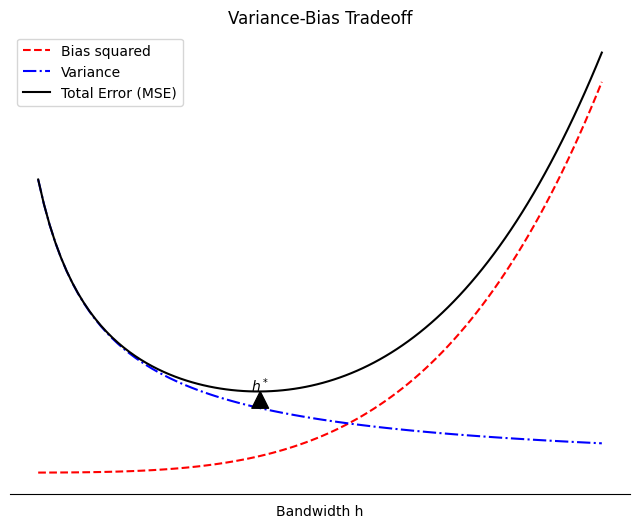

In [6]:
# Bandwidth selection that minimises the MSE
# Illustration of variance-bias tradeoff in MSE

# Custom value for the variables
C_X = 300
M2 = 20
M = 40
sig_sqr = 1

n = 200

h = np.linspace(0.1, 1, 100)

def variance_mse(h):
    return C_X * M2 / (n*h)

def squared_bias_mse(h):
    return h**4 * M**2 * sig_sqr**2 * 0.25

squared_bias = squared_bias_mse(h)
variance = variance_mse(h)

mse = variance + squared_bias

# Find the minimum mse (occurs at h*) for illustration 
h_star_index = np.argmin(mse)
h_star = h[h_star_index]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(h, squared_bias, 'k--', c='red', label='Bias squared')
plt.plot(h, variance, 'k-.', c='blue', label='Variance')
plt.plot(h, mse, 'k', label='Total Error (MSE)')

# Annotate h*
plt.annotate('$h^*$', xy=(h_star, mse[h_star_index]), xytext=(h_star, mse[h_star_index]),
             arrowprops=dict(facecolor='black', shrink=0.03), horizontalalignment='center')


plt.xlabel('Bandwidth h')
plt.title("Variance-Bias Tradeoff")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.legend()

plt.savefig(os.path.join(plots_folder, 'mse-var-bias-tradeoff.png'))

plt.show()
